___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [6]:
df.isnull().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [7]:
df = df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [10]:
df['review'].str.isspace().sum()

np.int64(27)

27

In [11]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [14]:
df = df[df['review'].str.strip() != '']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [16]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer(stop_words = 'english')

In [50]:
def top_word_frequencies_by_label(df, text_col, label_col, top_n):
    label_word_frequencies = {}
    for label in df[label_col].unique():
        label_df = df[df[label_col] == label]
        vectorizer = CountVectorizer(stop_words = 'english')
        X = vectorizer.fit_transform(label_df[text_col])
        word_counts = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.sum(axis=0).tolist()[0]})
        word_counts_sorted = word_counts.sort_values('count', ascending=False).head(top_n)
        label_word_frequencies[label] = word_counts_sorted
    return label_word_frequencies

In [51]:
top_20_words = top_word_frequencies_by_label(df, 'review', 'label', 20)

In [54]:
print(top_20_words['neg'])

             word  count
9136         film   4063
16000       movie   3131
14210        like   1808
13318        just   1480
24753        time   1127
10395        good   1117
2004          bad    997
4099    character    926
23426       story    908
18292        plot    888
4109   characters    838
14788        make    813
19670      really    743
26680         way    734
14328      little    696
7216          don    683
7164         does    666
7165        doesn    648
647        action    635
21226       scene    634


In [55]:
print(top_20_words['pos'])

             word  count
9925         film   5002
17200       movie   2389
15273        like   1721
14347        just   1273
25091       story   1199
11272        good   1193
26494        time   1175
4421    character   1037
15231        life   1032
4431   characters    957
28632         way    864
9941        films    851
7785         does    828
2737         best    788
19123      people    769
15879        make    764
15391      little    751
21070      really    731
15933         man    728
17640         new    702


Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [57]:
X = df['review']

In [58]:
y = df['label']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [61]:
from sklearn.pipeline import Pipeline

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [69]:
y_pred = pipe.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



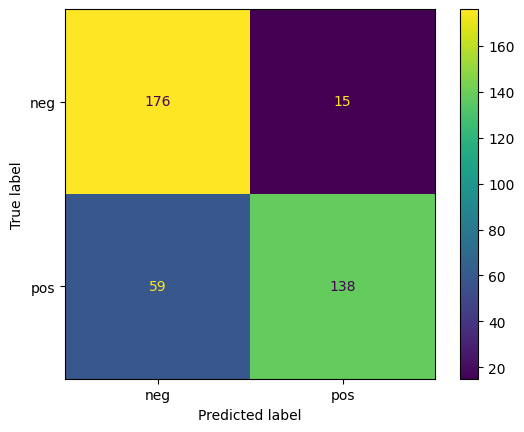

In [72]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

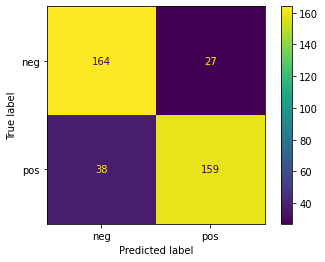

## Great job!